<a href="https://colab.research.google.com/github/Hassan7838/customer-segmentation-kmeans/blob/main/customer-segmentation-kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Customer Segmentation Analysis using K-Means Clustering

# Upload File to Colab
from google.colab import files
upload = files.upload()

Saving MallCustomers.csv to MallCustomers (1).csv


In [ ]:
# Viewing DataSet
import pandas as pd
df = pd.read_csv('MallCustomers.csv')

print("---First Five Rows---")
print(df.head())
print("---Information---")
print(df.info())
print("---Missing Values---")
print(df.isnull().sum())

---First Five Rows---
   CustomerID  Gender  Age  Annual_Income  Spending_Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40
---Information---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
---Missing Values---
CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64


In [ ]:
# Drop Useless Columns
df = df.drop(columns=['CustomerID'])
df = df.drop(columns=['Gender'])

# Standardized values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns = df.columns)

# Checking...
print(df.head())

        Age  Annual_Income  Spending_Score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980


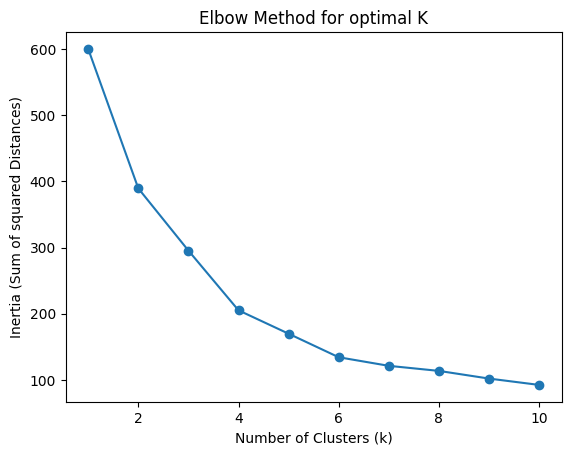

In [ ]:
# elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df)
  inertia_values.append(kmeans.inertia_)

plt.plot(range(1,11),inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of squared Distances)')
plt.title('Elbow Method for optimal K')
plt.show()

For k = 2 , Silhouette Score=0.335
For k = 3 , Silhouette Score=0.358
For k = 4 , Silhouette Score=0.404
For k = 5 , Silhouette Score=0.408
For k = 6 , Silhouette Score=0.431
For k = 7 , Silhouette Score=0.410
For k = 8 , Silhouette Score=0.367
For k = 9 , Silhouette Score=0.374
For k = 10 , Silhouette Score=0.362


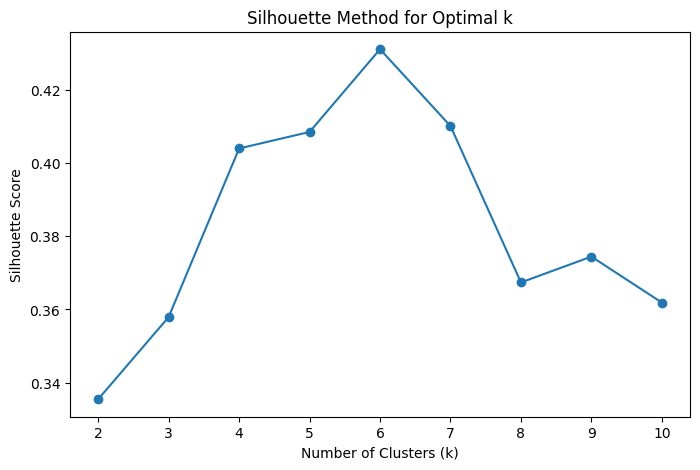

In [ ]:
# silhouette method
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(df)
  labels = kmeans.labels_

  score = silhouette_score(df,labels)
  silhouette_scores.append(score)
  print(f"For k = {k} , Silhouette Score={score:.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(2,11),silhouette_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()


In [ ]:
# Train final model
kmeans_final = KMeans(n_clusters=6, random_state=42)
kmeans_final.fit(df)

# Add cluster labels to original dataframe
df['Cluster'] = kmeans_final.labels_

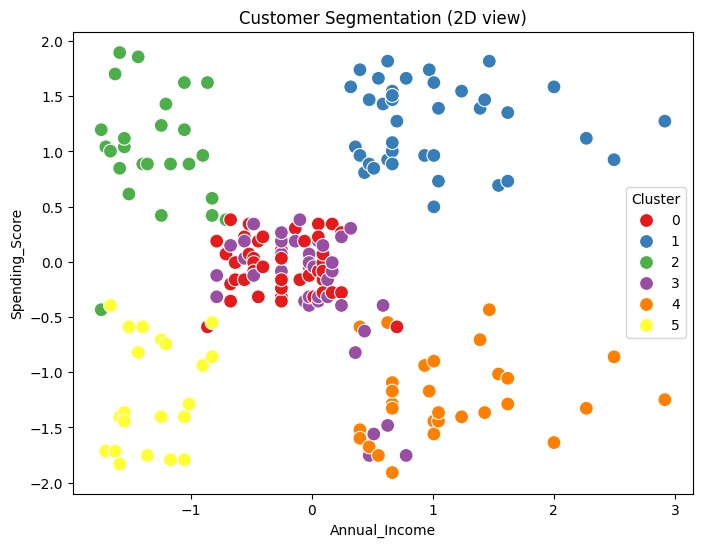

In [ ]:
# 2D plot
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual_Income'],
    y=df['Spending_Score'],
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title("Customer Segmentation (2D view)")
plt.show()

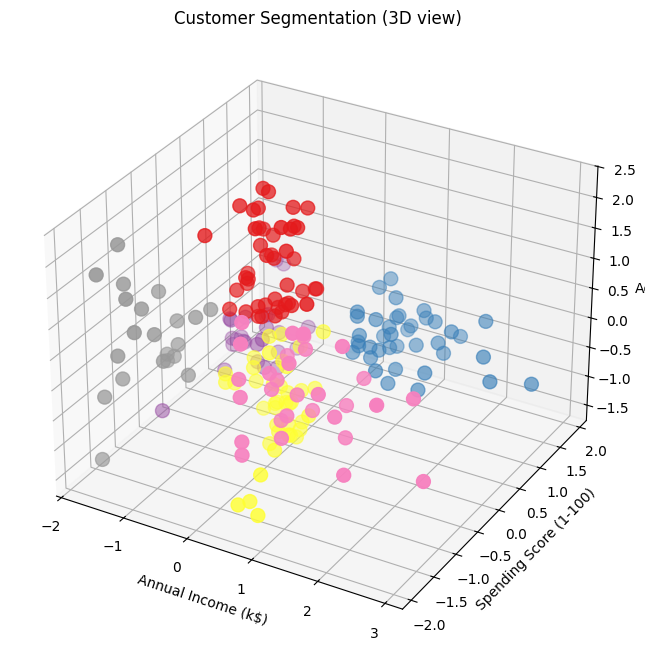

In [ ]:
# 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Annual_Income'],
    df['Spending_Score'],
    df['Age'],
    c=df['Cluster'],
    cmap='Set1',
    s=100
)

ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title("Customer Segmentation (3D view)")
plt.show()
